# Curso BancoEstado-CMM: Aprendizaje de Máquinas Avanzado 
**Autores:** Taco de Wolff y Felipe Tobar  

**Fecha:** 11 octubre, 2019


# Módulo 3 - Contenidos
- Pandas y DataFrames
- Acceso a SQL a través de Pandas

Introduction to Pandas: http://gregreda.com/2013/10/26/intro-to-pandas-data-structures/
DataFrame API: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html#pandas.DataFrame

## 0) Estructuras de datos
En Python tenemos distintas maneras de guardar y manejar estructuras de datos. Lo más básicos en que vamos a enfocar son los números (`3` o `4.5` o `8e10`), textos (`"example"`) y booleanos (`True` o `False`). Con estos elementos podemos construir estructuras de datos más complejos, por ejemplo listas, diccionarios o tuplas.

Listas y tuplas son objectos ordenados de múltiple elementos que pueden tener distintos tipos de datos. Ellos son como arreglos de datos. Las tuplas son inmutables. Listas son mutables y se puede agregar o elimilar elementos. Los índices siempre son números ordenados. Diccionarios son conjuntos de datos en que los índices no son ordenados y pueden ser otros tipos de datos, por ejemple textos o números con decimales.

Una lista por ejemplo es una lista de valores, escrito en Python con `[` y `]`:

In [1]:
lista = [3, 5, 2, 8, 1, 'texto']
lista

[3, 5, 2, 8, 1, 'texto']

In [2]:
lista[4]

1

Así podemos acceder el quinto elemento (que tiene índice `4`) que contiene el valor `1`. Los índices comienzan con `0`, como los siglos en que estamos en siglo 21 aunque el año está 2019.

También es posible acceder elementos a través de textos o otros números no ordenado. Esta estructura de datos se llama una diccionario y en Python está escrito con `{` y `}`:

In [3]:
diccionario = {'a': 5, 'b': 7, 9.3: 9}
diccionario

{'a': 5, 'b': 7, 9.3: 9}

In [4]:
diccionario[9.3]

9

Además hay el concepto de tuplas, que son como listas de valores. Pero para tuplas no puedes agregar o eleminar elementos, son fijados. En Python las tuplas son usado por ejemplo para los parámetros y retornos de funciónes (que son básicamente listas de distintos tipos de datos). En Python está escrito con `(` y `)`:

In [5]:
tup = (5, "text", [3.2, 4.5])
tup

(5, 'text', [3.2, 4.5])

In [6]:
tup[2]

[3.2, 4.5]

Pandas usa y extiende las estructuras de datos de Python.

## 1) Introducción
El manejo adecuado de datos es (naturalmente) un aspecto fundamental en ciencia de datos. Como se ha visto, NumPy permite un manejo básico de datos a través de sus operaciones sobre arreglos. No obstante, las tareas referentes al manejo de datos requieren habitualmente de funcionalidades más especificas.

### ¿Qué es Pandas?

Pandas es una librería open source para análisis de datos. Python siempre ha sido fantástico para preparar y montar datos, sin embargo, Python no es necesariamente bueno cuando hay que analizar datos. Uno regularmente termina usando R o cargando la base de datos usando SQL (o peor aún, Excel). 

Pandas hace que Python pueda ser usado satisfactoriamente para analizar datos. Podemos considerar Pandas como una extensión de NumPy basada en software libre y dirigida específicamente a la manipulación y análisis de datos en Python.

### ¿Cómo se relaciona Pandas con el resto de la suite de Python?

Pandas provee estructuras y operaciones para el trabajo de tablas numéricas y series de tiempo, es estándar en aplicaciones de ciencia de datos (basadas en Python). Se usa en conjunto con librerías de computación numérica (como Numpy y SciPy), librerías de visualización (como `matplotlib` y `seaborn`), librerías de analítica (como `statsmodels` y `scikit-learn`), entre otras.

El manejo de datos con Pandas toma los elementos de Numpy en cuanto a computación basada en arreglos y los expande al manejo de datos heterogéneos.



Como convención, Pandas se importa de la siguiente manera:

In [7]:
import pandas as pd

## 2) Estructuras de datos

Pandas propone dos nuevas estructuras de datos: Series y DataFrame, ambas construidas sobre NumPy (es decir, rápidas). Una serie es un objeto cuya estructura consiste en un arreglo unidimensional que contiene una sucesión de valores al cual se asocia un nuevo arreglo con las etiquetas de los datos, este último arreglo se denota como índice o index.

### 2.1) Series

Una Serie es un objeto unidimensional similar a un arreglo, lista, columna o tabla. La Serie tiene un índice asignado a cada ítem en la serie. Por defecto, cada ítem recibe un índice que va de 0 a N, donde N es el largo de la Serie menos uno.


In [8]:
# creamos una Series con valores arbitrarios
s = pd.Series([7, 'BancoEstado', 3.14, -1789710578, '¡Hoy es viernes!'])
print(s)

0                   7
1         BancoEstado
2                3.14
3         -1789710578
4    ¡Hoy es viernes!
dtype: object


In [9]:
s[1]  # imprimir el tercero elemento con index dos

'BancoEstado'

### 2.2) Índices
Los índices definen las referencias a los elementos o rangos de elementos en la serie. El índice puede ser numérico, textual, fechas, ...

In [10]:
#imprimir los indices  (por defecto)
print(s.index.values)

[0 1 2 3 4]


Podemos asignar nuestros propios valores de los índices de las siguientes formas, la primera es modificando el objeto `s.index`, es decir

In [11]:
s.index = ['i','n','d','e','x']
s

i                   7
n         BancoEstado
d                3.14
e         -1789710578
x    ¡Hoy es viernes!
dtype: object

Alternativamente, podemos construir la serie directamente con valores para sus índices:

In [12]:
s2 = pd.Series([7, 'BancoEstado', 3.14, -1789710578, '¡Hoy es viernes!'],
              index=['A', 'Z', 'C', 'Y', 'E'])
s2

A                   7
Z         BancoEstado
C                3.14
Y         -1789710578
E    ¡Hoy es viernes!
dtype: object

El constructor de la serie puede tomar un _diccionario_ también. Veamos a  continuación la construcción de una serie que contiene los habitantes de las principales ciudades de Chile (en base a su población) desde un diccionario que contiene esa información. 

In [13]:
dicc = {'Santiago': 6139087, 'Concepción': 972714, 'Valparaíso': 951311, 
     'Coquimbo': 399450, 'Antofagasta': None}
ciudades = pd.Series(dicc)
ciudades

Santiago       6139087.0
Concepción      972714.0
Valparaíso      951311.0
Coquimbo        399450.0
Antofagasta          NaN
dtype: float64

Los índices sirven precisamente para referenciar (y cambiar!) los valores de la lista, en particular para _llamarlos_

In [14]:
#rescatar el valor para una ciudad
ciudades['Santiago']

6139087.0

In [15]:
#reasigna el valor para una ciudad
ciudades['Santiago'] = 6200000
print(ciudades['Santiago'])

6200000.0


In [16]:
#rescatar el valor para múltiples ciudades
ciudades[['Santiago','Concepción']]

Santiago      6200000.0
Concepción     972714.0
dtype: float64

Podemos incluso usar _indexacción booleana_ es decir:

In [17]:
ciudades[ciudades < 500000]

Coquimbo    399450.0
dtype: float64

para entender esto, veamos que el enunciado `ciudades > 500000` entrega un arreglo de variables booleanas (*True* y *False*) denotando las posiciones donde se cumple el enunciado. Luego, al pasar este arreglo booleano como _indices_ del arreglo, solo se reportan  los valores para las entradas _True_

In [18]:
arreglo = ciudades > 500000
print('Arreglo de booleans es:')
print(arreglo)
print('\n')
print('Arreglo de ciudades es:')
print(ciudades[arreglo])

Arreglo de booleans es:
Santiago        True
Concepción      True
Valparaíso      True
Coquimbo       False
Antofagasta    False
dtype: bool


Arreglo de ciudades es:
Santiago      6200000.0
Concepción     972714.0
Valparaíso     951311.0
dtype: float64


Estos operadores booleanso sirven también para verificar si un índice pertenece a la serie, por ejemplo

In [19]:
print('Santiago' in ciudades)
print('Peor es Nada' in ciudades)

True
False


Podemos incluso asignar rangos de fechas a nuestros índices usando la método `pandas.date_range`

In [20]:
serie_multi = pd.Series([7, 5, 3.14, -178, 0.27, 55])
serie_multi.index = pd.date_range(start='2019-01-01', end='2019-01-06', freq='D')
serie_multi

2019-01-01      7.00
2019-01-02      5.00
2019-01-03      3.14
2019-01-04   -178.00
2019-01-05      0.27
2019-01-06     55.00
Freq: D, dtype: float64

Finalmente, veamos que podemos asignar multiples índices usando  de fechas a nuestros índices usando la método `pandas.MultiIndex.from_arrays`

In [21]:
serie_multi.index = pd.MultiIndex.from_arrays(
    [[0,0,0,1,1,1], ['a','b','c','a','b','c']])
serie_multi

0  a      7.00
   b      5.00
   c      3.14
1  a   -178.00
   b      0.27
   c     55.00
dtype: float64

La serie tiene dos índices. Un índice principal (`0` o `1`) y un segundo (`a`, `b`, `c`). Acceder una fila sola, necesitamos pasar dos índices. Primero, accedemos la primér índice:

In [22]:
serie_multi[1]

a   -178.00
b      0.27
c     55.00
dtype: float64

Después podemos acceder una fila sola con el segundo índice:

In [23]:
serie_multi[1,'b']

0.27

Es posible seleccionar el segundo índice solo también, por usar el cáracter `:` que signífica seleccionar todo de ese índice.

In [24]:
serie_multi[:,'b']

0    5.00
1    0.27
dtype: float64

Normalmente no agregamos datos a Series o DataFrames y solo cambiamos la vista a nuestros datos. Por ejemplo, cargamos nuestros datos desde un archivo de CSV y después seleccionamos parte de nuestros datos según una condición. Pero, a veces queremos construir una serie poco a poco, agregando filas. El método recomendada es agregar todo a una lista o diccionario de Python y después construir la serie:

In [25]:
serie = pd.Series([50, 100, 150, 200], index=range(0,4))
serie

0     50
1    100
2    150
3    200
dtype: int64

Si luego queremos agregar más filas, podemos agregar otra Serie. Fíjate en los índices!

In [26]:
serie = serie.append(pd.Series([250, 300, 350, 400], index=range(4,8)))
serie

0     50
1    100
2    150
3    200
4    250
5    300
6    350
7    400
dtype: int64

### 2.3) Acceder los datos al fondo
En el fondo, los datos en Pandas objectos (`Index`, `Series`, `DataFrame`) son arreglos de datos, y Pandas sólo proviene una manera de manejar los. Con `array` obtenemos un tipo de datos fundamental de Pandas. Mientras, `values` nos da los elementos en formato de NumPy. También para la columna de índices podemos acceder los valores.

In [27]:
serie_multi.array

<PandasArray>
[7.0, 5.0, 3.14, -178.0, 0.27, 55.0]
Length: 6, dtype: float64

In [28]:
serie_multi.values

array([   7.  ,    5.  ,    3.14, -178.  ,    0.27,   55.  ])

In [29]:
serie_multi.index.values

array([(0, 'a'), (0, 'b'), (0, 'c'), (1, 'a'), (1, 'b'), (1, 'c')],
      dtype=object)

## 3) DataFrame
Una serie representa un arreglo unidimensional enriquecido por índices y manejo de valores faltantes. Un `DataFrame` por su parte, representa una tabla rectangular, donde los datos están contenidos en una estructura ordenada y basada en columnas, las cuales pueden ser de distintos tipos (`int`, `str`, `bool`).

Un `DataFrame` posee índices para sus columnas y sus filas. Al igual que la series, se puede observar como un diccionario de NumPy donde cada campo es una serie, cada una de las cuales, comparten el mismo índice. Si bien esta noción describe un objeto 2-dimensional, es posible obtener representaciones dimensionalmente superiores mediante una indexación adecuada.

Existen varias formas de construir un `DataFrame`, una manera conveniente, consiste en definir un diccionario de listas, todas de igual longitud:

In [30]:
data = {'ciudad': ['Temuco', 'Temuco', 'Temuco', 'Iquique', 'Iquique', 'Iquique'],
        'year': [2000, 2001, 2002, 2001, 2002, 2003],
        'pob': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

df = pd.DataFrame(data)
df

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6
3,Iquique,2001,2.4
4,Iquique,2002,2.9
5,Iquique,2003,3.2


El tamaño dice que tenemos seis filas y tres columnas:

In [31]:
df.shape

(6, 3)

Una manera de ver a los primeros filas de datos es la función `head`. Esta es muy util para ver todas las columnas y averiguar si los datos son bien cargado. También existe la función `tail` que nos da los últimas filas.

In [32]:
df.head(3)

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6


Los datos disponibles de DataFrame de Pandas son por ejemplo el índice `index`, los nombres de columnas `columns`, todo los valores en el DataFrame en formato de NumPy `values`, los números de valores por columna `count()`, y información de nuestro DataFrame `info()`.

In [33]:
print("El objecto de índices:")
print(df.index)

print("\nLos valores de índices:")
print(df.index.values)

print("\nLas columnas:")
print(df.columns)

print("\nLos valores:")
print(df.values)

print("\nCuenta de filas por columna:")
print(df.count())

print("\nInformación:")
df.info()

El objecto de índices:
RangeIndex(start=0, stop=6, step=1)

Los valores de índices:
[0 1 2 3 4 5]

Las columnas:
Index(['ciudad', 'year', 'pob'], dtype='object')

Los valores:
[['Temuco' 2000 1.5]
 ['Temuco' 2001 1.7]
 ['Temuco' 2002 3.6]
 ['Iquique' 2001 2.4]
 ['Iquique' 2002 2.9]
 ['Iquique' 2003 3.2]]

Tamaño:
(6, 3)

Cuenta de filas por columna:
ciudad    6
year      6
pob       6
dtype: int64

Información:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
ciudad    6 non-null object
year      6 non-null int64
pob       6 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 272.0+ bytes


Para ver estadísticas simples de nuestros datos, usamos la función `describe()`:

In [34]:
df.describe()

,year,pob
count,6.000000,6.000000
mean,2001.500000,2.550000
std,1.048809,0.836062
min,2000.000000,1.500000
25%,2001.000000,1.875000
50%,2001.500000,2.650000
75%,2002.000000,3.125000
max,2003.000000,3.600000


### 3.1) Seleccionar datos
Con DataFrames tenemos al menos tres maneras de acceder files o celdas. La primera manera es usando el operador de índice (`variable[índice]`) que nos da una columna. Entonces, el índice debe ser el nombre de la columna y el retorno será la Serie que representa la columna.

Además tenemos dos funciones `loc` y `iloc` que pueden acceder filas, columnas o celdas con sus nombres (`loc`) o con sus posiciones (`iloc`). A estas funciones puedes dar dos indíces, en que el primero selecciona la fila y el segundo la columna. El segundo no es obligatorio.

Seleccionando la columna 'year' nos da una serie que representa la columna:

In [35]:
df['pob']

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pob, dtype: float64

La forma más corta es abajo, que es implícito lo mismo que arriba:

In [36]:
df.pob

0    1.5
1    1.7
2    3.6
3    2.4
4    2.9
5    3.2
Name: pob, dtype: float64

#### 3.1.1) Selectionar con `loc`
Para obtener una selección usando etiquetas, reemplazamos los índices con nombres:

In [37]:
df.index = ['A','B','C','D','E','F']
df

,ciudad,year,pob
A,Temuco,2000,1.5
B,Temuco,2001,1.7
C,Temuco,2002,3.6
D,Iquique,2001,2.4
E,Iquique,2002,2.9
F,Iquique,2003,3.2


Así seleccionamos una fila:

In [38]:
df.loc['D']

ciudad    Iquique
year         2001
pob           2.4
Name: D, dtype: object

O múltiple filas:

In [39]:
df.loc['B':'E']

,ciudad,year,pob
B,Temuco,2001,1.7
C,Temuco,2002,3.6
D,Iquique,2001,2.4
E,Iquique,2002,2.9


O todas las filas y solo la columna `year`:

In [40]:
df.loc[:, 'year']

A    2000
B    2001
C    2002
D    2001
E    2002
F    2003
Name: year, dtype: int64

O solo unas filas y las columnas `year` y `pob`:

In [41]:
df.loc['A':'B', ['year', 'pob']]

,year,pob
A,2000,1.5
B,2001,1.7


O solo una celda:

In [42]:
df.loc['A', 'pob']

1.5

#### 3.1.2) Selectionar con `iloc`
Acceder una fila a través de la posición de la fila:

In [43]:
df.iloc[3]

ciudad    Iquique
year         2001
pob           2.4
Name: D, dtype: object

También un rango de filas y columnas:

In [44]:
df.iloc[1:5, 0:2]

,ciudad,year
B,Temuco,2001
C,Temuco,2002
D,Iquique,2001
E,Iquique,2002


O una celda sola:

In [45]:
df.iloc[0,2]

1.5

### 3.2) Selectionar por booleanos
Podemos acceder filas y columnas con una lista de booleanos, en que cada elemento dice si está incluido en la fila (`True`) o no (`False`). En este ejemplo seleccionamos la tercera, quinta y sexta fila:

In [46]:
df.loc[[False, False, True, False, True, True]]

,ciudad,year,pob
C,Temuco,2002,3.6
E,Iquique,2002,2.9
F,Iquique,2003,3.2


Podemos construir un arreglo de booleanos con una condición en nuestro DataFrame. Por ejemplo, si quieremos seleccionar las files que tienen más que una población de `3`, construimos una serie de booleanos así:

In [47]:
df.pob > 3.0

A    False
B    False
C     True
D    False
E    False
F     True
Name: pob, dtype: bool

Este Serie de booleanos podemos usar para seleccionar filas en un DataFrame:

In [48]:
df[df.pob > 3.0]

,ciudad,year,pob
C,Temuco,2002,3.6
F,Iquique,2003,3.2


## 4) Reordenar
Con la función `sort_values` podemos reordenar nuestras filas en el DataFrame. Le pasamos cual columna queremos reordenar (con `by`), y que dirección (ascendiendo o descendiendo con `ascending`), y el `inplace` que signífica reemplazar los índices en el mismo DataFrame. Si `inplace` es `False`, la función retornará un nuevo DataFrame que está reordenado, y deja el originál como era.

Los parámetros `by` y `ascending` pueden ser listas también, en que reordenamos primero por la primera columna y después con la segunda etc.

In [49]:
autos = {'Marca':  ['Honda Civic', 'Toyota Corolla', 'Ford Focus', 'Audi A4'],
         'Precio': [22000, 25000, 27000, 35000],
         'Año':    [2015, 2013, 2018, 2018]
        }
 
df = pd.DataFrame(autos, columns= ['Marca', 'Precio','Año'])
df

,Marca,Precio,Año
0,Honda Civic,22000,2015
1,Toyota Corolla,25000,2013
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


In [50]:
df.sort_values(by=['Marca'], inplace=True, ascending=True)
df

,Marca,Precio,Año
3,Audi A4,35000,2018
2,Ford Focus,27000,2018
0,Honda Civic,22000,2015
1,Toyota Corolla,25000,2013


In [51]:
df.sort_values(by=['Año', 'Marca'], inplace=True, ascending=[True, False])
df

,Marca,Precio,Año
1,Toyota Corolla,25000,2013
0,Honda Civic,22000,2015
2,Ford Focus,27000,2018
3,Audi A4,35000,2018


## 5) Aggregate y GroupBy
`GroupBy` te da la oportunidád de grupar datos y reducir los datos. Por ejemplo, queremos grupar los datos según una columna. Está columna será el nuevo índice del DataFrame. Abajo tenemos las velocidades de pájaros, y queremos saber más por tipo de pájaro:

In [52]:
df = pd.DataFrame({'Pájaro': ['Falcon', 'Falcon', 'Eagle', 'Eagle', 'Eagle', 'Condor', 'Condor', 'Condor'],
                   'Velocidad': [80., 65., 45., 51., 49., 54., 50., 62.]})
df

,Pájaro,Velocidad
0,Falcon,80.0
1,Falcon,65.0
2,Eagle,45.0
3,Eagle,51.0
4,Eagle,49.0
5,Condor,54.0
6,Condor,50.0
7,Condor,62.0


Grupamos por pájaro y extraemos el promedio:

In [53]:
df.groupby('Pájaro').mean()

,Velocidad
Pájaro,
Condor,55.333333
Eagle,48.333333
Falcon,72.500000


Podemos usar funciónas más complicadas con `aggregate`, en este ejemplo usamos `np.min` que nos da el mínimo de nuestra selección:

In [55]:
import numpy as np
df.groupby('Pájaro').aggregate(np.min)

,Velocidad
Pájaro,
Condor,50.0
Eagle,45.0
Falcon,65.0


## 6) Graficar
Pandas tiene la posibilidad de graficar sus DataFrames facilmente. Por ejemplo, abajo mostramos varios métodos de graficar con datos de números aleatorios. También hay otros tipos de grafos, ve a https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html para ver a todos tipos de grafos que proviene Pandas.

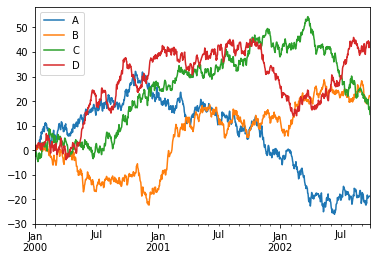

In [66]:
import numpy as np
datos = np.random.randn(1000, 4)
index = pd.date_range('2000-01-01', periods=1000, freq='D')

df = pd.DataFrame(datos, index=index, columns=list('ABCD'))
df = df.cumsum()
df.plot()

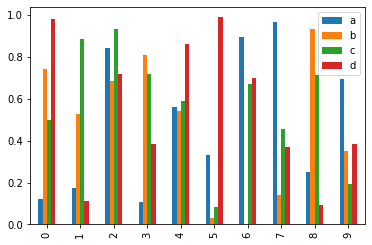

In [57]:
df = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df.plot.bar();

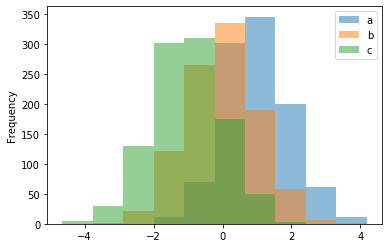

In [58]:
df = pd.DataFrame({'a': np.random.randn(1000) + 1,
                   'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1},
                  columns=['a', 'b', 'c'])
df.plot.hist(alpha=0.5);

## 7) Cargando CSV, Excel, HDF5
Pandas es capaz de cargar una variedad de tipos de datos, incluyo son:
- CSV
- JSON
- HTML
- Excel
- HDF5 format
- Feather format
- Parquet format
- Msgpack
- Stata
- SAS
- SQL

Acá guardamos y cargamos los datos con CSV y Excel. Para ver más formatos, ve https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html

In [59]:
df = pd.DataFrame({'ciudad': ['Temuco', 'Temuco', 'Temuco', 'Iquique', 'Iquique', 'Iquique'],
                   'year': [2000, 2001, 2002, 2001, 2002, 2003],
                   'pob': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]})

### 6.1) CSV

In [60]:
df.to_csv('poblacion.csv')

In [61]:
pd.read_csv('poblacion.csv', index_col=0)

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6
3,Iquique,2001,2.4
4,Iquique,2002,2.9
5,Iquique,2003,3.2


### 6.2) XLSX

In [62]:
df.to_excel('poblacion.xlsx', sheet_name='Poblacion por ciudad')

In [63]:
pd.read_excel?

In [64]:
pd.read_excel('poblacion.xlsx', index_col=0, na_values=['NA'])

,ciudad,year,pob
0,Temuco,2000,1.5
1,Temuco,2001,1.7
2,Temuco,2002,3.6
3,Iquique,2001,2.4
4,Iquique,2002,2.9
5,Iquique,2003,3.2


## 8) SQL
Qué es Structured Query Language, o SQL? Es una lenguaje de comunicación con bases de datos relacionados. Se usa para seleccionar, agregar, sacar, actualizar datos con los comandos `SELECT`, `INSERT`, `UPDATE`, `DELETE`, ... SQL es una lenguaje estandardizado y es construido para usar con base de datos grandes (millones de filas de datos). SQL tiene muchas implementaciones distintas, cada con su specialidad. Por ejemplo MySQL (usado mucho para sitios de web), MSSQL (de Microsoft), Oracle, Postgres, SQLite ...

Acá mostramos como seleccionar datos de un server de SQL y cargar los en un DataFrame. SQLite es una implentación más sencilla y bien para mostrar. Seleccionando y cargando datos de otras implementaciones funciona lo mismo con DataFrames. Con SQLite hacemos el siguiente:

```
import sqlite3

conn = sqlite3.connect("mydatabase_filename.sqlite")
df = pd.read_sql_query("SELECT * FROM <tablename>", conn)
```

mientras para Postgres hacemos:

```
import psycopg2 as pg
import pandas.io.sql as psql

conn = pg.connect("dbname=mydatabase user=postgres")
df = psql.frame_query("SELECT * FROM <tablename>", conn)
```

In [65]:
import sqlite3

conn = sqlite3.connect("db.sqlite")
df = pd.read_sql_query("SELECT * FROM ventas_costos WHERE Costos_Fijos_IT > 100000", conn)

print("Número de files:")
display(df.count())

print("\nPrimero cinco filas:")
display(df.head())

print("\nEstadísticas de la columna 'Costos_Fijos_IT':")
print(df['Costos_Fijos_IT'].describe())

Número de files:


index                  6660
Id                     6660
Periodo                6660
Ventas_IT              6660
Otros_Ingresos_IT      6660
                       ... 
SCP_MIC_GRP_FAM_NNO    6660
SCP_MIC_GST_FAM_SME    6660
SCP_MIC_OTR_GST_VIV    6660
SCP_MIC_PRD_COS_MOB    6660
SCP_MIC_PRD_COS_MPM    6660
Length: 143, dtype: int64


Primero cinco filas:


,index,Id,Periodo,Ventas_IT,Otros_Ingresos_IT,Costos_Fijos_IT,Costos_Variables_IT,Capacidad_Pago_Ajustada_IT,Capacidad_Pago_IT,Resultado_Operacional_IT,...,SCP_MCE_FEC_ULT_CRD,SCP_MCE_LCR_DIS,SCP_MPD_MNT_SOL,SCP_MBU_SBS_HBT_ASG,SCP_MIC_GRP_FAM_ADL,SCP_MIC_GRP_FAM_NNO,SCP_MIC_GST_FAM_SME,SCP_MIC_OTR_GST_VIV,SCP_MIC_PRD_COS_MOB,SCP_MIC_PRD_COS_MPM
0,2,3,201601,2650972,107927,385000,1423333,271055,451759,842639,...,9999-12-31,0,1000000,0,2,0,300000,0,0.0,1.400000e+38
1,3,4,201601,3926041,0,578000,2100000,638155,638155,1248041,...,2015-05-08,1794000,3000000,0,2,0,300000,0,0.0,3.900000e+33
2,4,5,201601,3707743,0,1141180,1360000,638683,638683,1206563,...,2013-12-23,615000,8000000,0,3,1,450000,0,0.0,1.150000e+34
3,12,13,201601,4155904,425000,150000,2880208,289214,723036,1125696,...,2013-09-16,426000,1300000,0,2,0,200000,0,0.0,2.800000e+38
4,16,17,201601,1663259,140000,111025,1220000,224317,224317,332234,...,2013-03-06,0,3000000,0,2,0,200000,0,0.0,8.000000e+31



Estadísticas de la columna 'Costos_Fijos_IT':
count    6.660000e+03
mean     6.232622e+05
std      1.121243e+06
min      1.001250e+05
25%      1.690922e+05
50%      3.120000e+05
75%      6.512500e+05
max      2.520000e+07
Name: Costos_Fijos_IT, dtype: float64
